# 문서 유사도
- 두 문서가 내용적으로 얼마나 비슷한지를 수치로 나타낸다.
- 보통 문서를 벡터(TF-IDF 등)로 바꾼 후, 벡터 간 거리/각도를 계산해서 유사도를 구한다.

In [59]:
import os, glob
import pandas as pd

path = './data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)

    # 파일명
    filename = os.path.basename(file_)
    filenam = filename.split('.')[0]
    filename_list.append(filename)

    # 의견
    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions)

document_df = pd.DataFrame(
    {
        'filename': filename_list,
        'opinions': opinions_list
    }
)
document_df

,filename,opinions
0,accuracy_garmin_nuvi_255W_gps.txt.data,...
1,bathroom_bestwestern_hotel_sfo.txt.data,...
2,battery-life_amazon_kindle.txt.data,...
3,battery-life_ipod_nano_8gb.txt.data,...
4,battery-life_netbook_1005ha.txt.data,...
5,buttons_amazon_kindle.txt.data,...
6,comfort_honda_accord_2008.txt.data,...
7,comfort_toyota_camry_2007.txt.data,...
8,directions_garmin_nuvi_255W_gps.txt.data,...
9,display_garmin_nuvi_255W_gps.txt.data,...


In [60]:
# 표제어 추출 전처리 함수
import string
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    text = text.lower()
    
    punc_rem_dict = dict((ord(ch),None) for ch in string.punctuation)   # 문자부호 제거용 치환 딕셔너리
    text = text.translate(punc_rem_dict)  
    
    tokens = nltk.word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    
    return [lemmatizer.lemmatize(token,pos='v') for token in tokens]    



In [61]:
# lemmatize. 적용한 TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer= lemmatize,       # 사용자 정의 토크나이저(표제어 추출) 적용
    stop_words= 'english',      # 영어 불용어 제거 
    ngram_range= (1, 2),        # 1-gram ~ 2-grama
    max_df= 0.85,               # 전체 문서에서 85% 초과해 등장하면 흔한 단어 제외
    min_df= 0.05                # 전체 문서의 5% 미만에 등장하면 너무 회귀한 단어 제외
)

opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])     # 문서를 TF-IDF 변환 (희소행렬)
print(opinions_vecs.toarray().shape)    # (문서 수, 특성 수)
print(opinions_vecs)                    # 희소행렬 출력 

c:\nlp\nlp_venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\nlp\nlp_venv\Lib\site-packages\sklearn\feature_extraction\text.py:411: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


(51, 4072)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 25383 stored elements and shape (51, 4072)>
  Coords	Values
  (0, 165)	0.7742542979210241
  (0, 1463)	0.07204716607359458
  (0, 3407)	0.016130297873354668
  (0, 2815)	0.03322048155310359
  (0, 1016)	0.1613798782436557
  (0, 1866)	0.020663607871398704
  (0, 1444)	0.013478481520354605
  (0, 1053)	0.007936997735176827
  (0, 2031)	0.01013758802410648
  (0, 360)	0.015122124086220925
  (0, 2358)	0.02934179604430104
  (0, 3165)	0.017183123909565296
  (0, 3550)	0.012166058278124673
  (0, 2226)	0.019655434084264962
  (0, 2686)	0.015122124086220925
  (0, 1459)	0.017322714375150577
  (0, 1799)	0.018011791518398646
  (0, 3143)	0.05196814312545173
  (0, 2540)	0.016699368276168712
  (0, 2266)	0.17743327660690134
  (0, 2803)	0.016699368276168712
  (0, 443)	0.015122124086220925
  (0, 1910)	0.04757120962562307
  (0, 1532)	0.2161414982207837
  (0, 3798)	0.017322714375150577
  :	:
  (50, 232)	0.012712026490235473
  (50, 2966)	0.0127

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)

document_df["cluster"] = kmeans.fit_predict(opinions_vecs)


In [63]:
hotel_idx = document_df[document_df['cluster'] == 1].index
print(hotel_idx.shape)
print(hotel_idx)

(15,)
Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

opinions_sim = cosine_similarity(opinions_vecs[1], opinions_vecs)

In [66]:
# 유사도 기준 높은순 정렬
opinions_sorted_idx = opinions_sim.argsort()[:, ::-1]   
opinions_sorted_idx = opinions_sorted_idx[:, 1:]
opinions_sorted_idx = opinions_sorted_idx.reshape(-1)

result_df = document_df.iloc[opinions_sorted_idx][['filename', 'cluster']]
opinions_sim = opinions_sim.reshape(-1)
result_df['similarity'] = opinions_sim[opinions_sorted_idx]

result_df

,filename,cluster,similarity
32,room_holiday_inn_london.txt.data,1,0.511197
30,rooms_bestwestern_hotel_sfo.txt.data,1,0.416834
31,rooms_swissotel_chicago.txt.data,1,0.360281
39,service_holiday_inn_london.txt.data,1,0.152102
40,service_swissotel_hotel_chicago.txt.data,1,0.150695
28,price_holiday_inn_london.txt.data,0,0.116268
38,service_bestwestern_hotel_sfo.txt.data,1,0.114993
45,staff_bestwestern_hotel_sfo.txt.data,1,0.098514
46,staff_swissotel_chicago.txt.data,1,0.080261
15,free_bestwestern_hotel_sfo.txt.data,1,0.062488


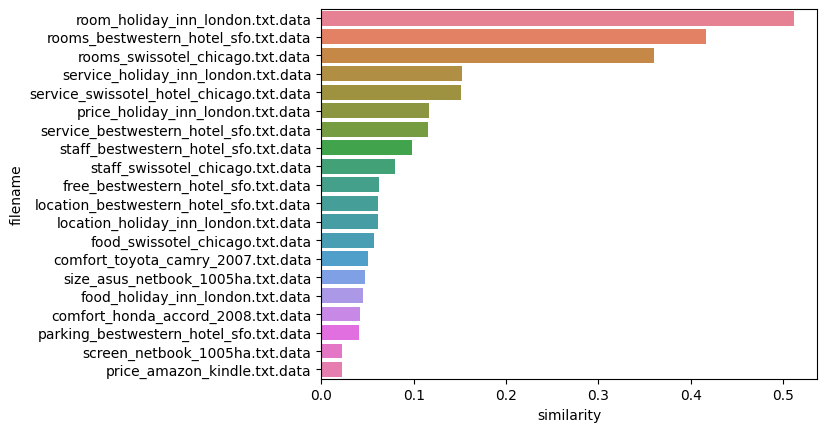

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x='similarity',     # x축은 유사도 값
    y = 'filename',     # y축은 파일명
    data = result_df.iloc[:20], # 유사도 상위 20%
    hue = 'filename'    # 색상 : 파일명으로 구분
)
plt.show()